In [100]:
#Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)

We shall start by loading the data and doing a visual assesment of the data

In [101]:
df = pd.read_csv('survey_results_public.csv')

In [102]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

Then, we shall create our Location variable, which will indicate if the data point comes from North America or Europe

In [103]:
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']
    
#Add a new catagory seperating to western and eastern
df['Location'] = df['Country'].apply(lambda x: 'Europe' if x in Europe 
                                     else ('North_America' if x in North_America else 'Other'))


Now we create the dataframe that we shall wrangle, first of all by choosing our columns of interest, and then by filtering out data that we don't want, such as countries outside of North America and Europe, people who are not a professional developer or are not employed full time

In [104]:

columns = ['Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction', 'JobSatisfaction',
           'HoursPerWeek', 'Salary', 'HighestEducationParents', 'Location']

# We apply our filters
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']
data = data[data['Location'].isin(["Europe","North_America"])]

# we filter our columns of interest
data = data[columns]

Since we will use the number of years in a job, we shall map a value that will be easier to read and also easier to plot

In [105]:
years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20,
            np.nan : -1}

data = data.reset_index()
data['YearsCodedJob'] = data['YearsCodedJob'].apply(lambda x: years[x])
data['YearsCodedJob'] = pd.to_numeric(data['YearsCodedJob'])

Now, as a person looking for a new place to work, salary is one of the main concerns, so lets investigate which of the 2 continents has a higher salary in general

In [107]:
salary_academics = data[data['Salary'].notnull()]

columns = ['Country', 'YearsCodedJob', 'FormalEducation','Salary', 'Location']

salary_academics = salary_academics[salary_academics['FormalEducation'].isin(["Bachelor's degree","Master's degree",
                                                                              'Doctoral degree'])]
salary_academics = salary_academics[columns]

salary_academics.dropna(inplace=True)

In [ ]:
as to avoid the data to be influenced too much by outliers, we shall take the median as our value of comparison

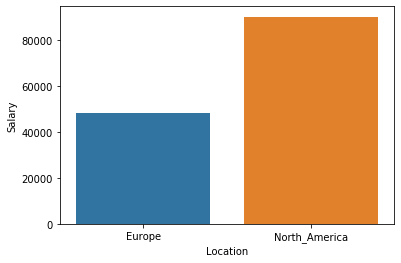

In [118]:
x = salary.groupby(['Location'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = x)

> We can easily see that North America has a higher salary than Europe, but, that may change if you have a higher education.

Since we are also thinking of doing a master's degree in the near future, we are curious to see how much does formal education change your salary in each continent

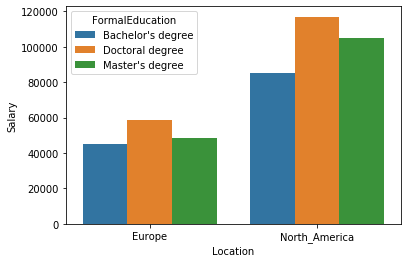

In [110]:
x = salary.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', data = x)

> We can see that with a bachelor's, master's or a PhD, you will have a better salary in North America.

But that is not all that is important, since we are planning on living for a long time on our new home, so we need to have a clear idea if salaries experience growth as we have more and more experience at our jobs

In [111]:
salary_years = data[data['Salary'].notnull()]

columns = ['Country', 'YearsCodedJob','Salary', 'Location']

salary_years = salary_years[columns]

salary_years.dropna(inplace=True)

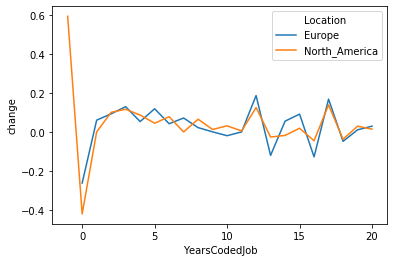

In [123]:
salary_years = salary_years.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()

salary_years['change'] = salary_years['Salary'].pct_change() 

salary_years.dropna(inplace=True)

ax = sns.lineplot(x="YearsCodedJob", y="change", hue="Location", data=salary_years)


In [115]:
CareerSatisfaction = data[data['Salary'].notnull()]

columns = ['Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction',
           'Salary', 'Location']
CareerSatisfaction = CareerSatisfaction[columns]

CareerSatisfaction.dropna(inplace=True)

CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8922 entries, 0 to 18891
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             8922 non-null   object 
 1   YearsCodedJob       8922 non-null   int64  
 2   FormalEducation     8922 non-null   object 
 3   CareerSatisfaction  8922 non-null   float64
 4   Salary              8922 non-null   float64
 5   Location            8922 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 487.9+ KB


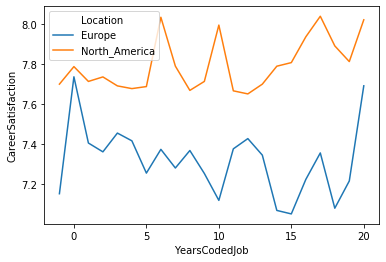

In [116]:
CareerSatisfaction = CareerSatisfaction.groupby(['Location','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()

ax = sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Location", data=CareerSatisfaction)